In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [29]:
cd data

/Users/zwang/GWU/Kaggle/Housing_Mkt/data


In [68]:
# Read Training Data
train_df = pd.read_csv('../data/train.csv', parse_dates=['timestamp'])
train_df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

Let us start with target variable exploration - 'price_doc'. First let us do a scatter plot to see if there are any outliers in the data

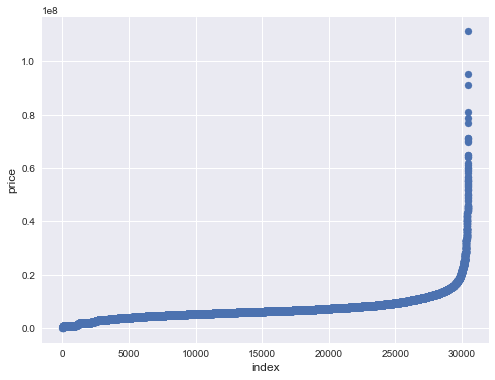

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price_doc.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

Looks okay. We can now bin the 'price_doc' and plot it.

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


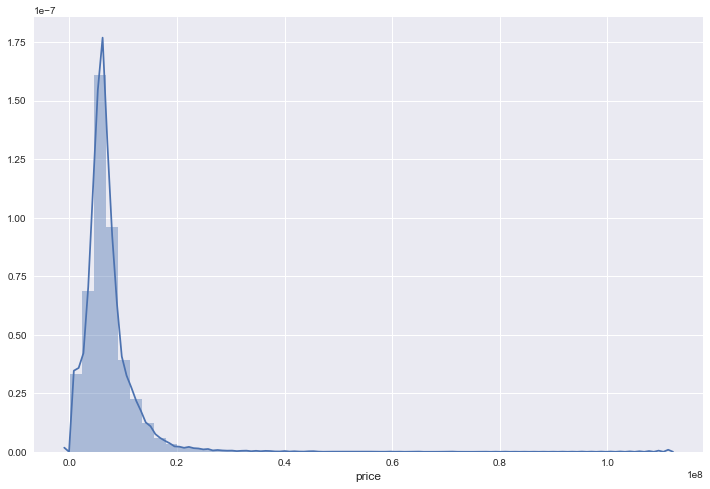

In [37]:
plt.figure(figsize=(12,8))
sns.distplot(train_df.price_doc.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

The target variable "price_doc" ahs a very long right tail. Let us plot the log of price_doc variable.

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


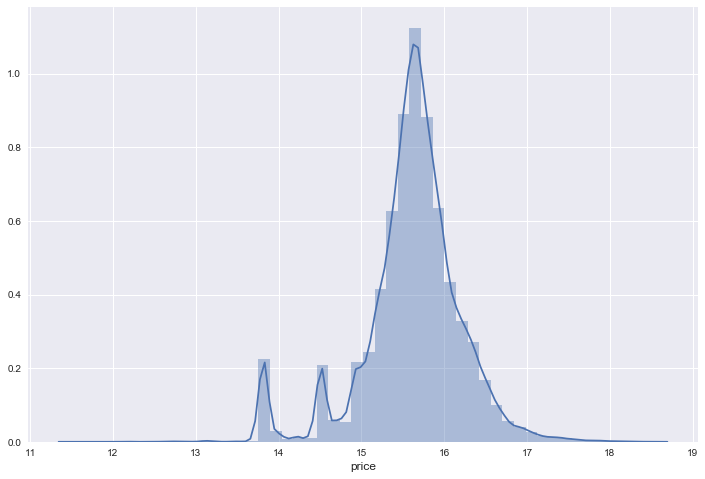

In [38]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(train_df.price_doc.values), bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

This looks much better than the previous one. So we decided to use the log of price in our future analysis.

In [69]:
train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

Let us explore the number of missing values in each column.

In [47]:
train_na = (train_df.isnull().sum() / len(train_df)) * 100
#train_na = train_df.isnull().sum()
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
train_na.head(10)

hospital_beds_raion           47.392603
build_year                    44.649011
state                         44.498047
cafe_sum_500_min_price_avg    43.585704
cafe_sum_500_max_price_avg    43.585704
cafe_avg_price_500            43.585704
max_floor                     31.413475
material                      31.413475
num_room                      31.413475
kitch_sq                      31.413475
dtype: float64

[<matplotlib.text.Text at 0x143aac908>, <matplotlib.text.Text at 0x143bb5080>]

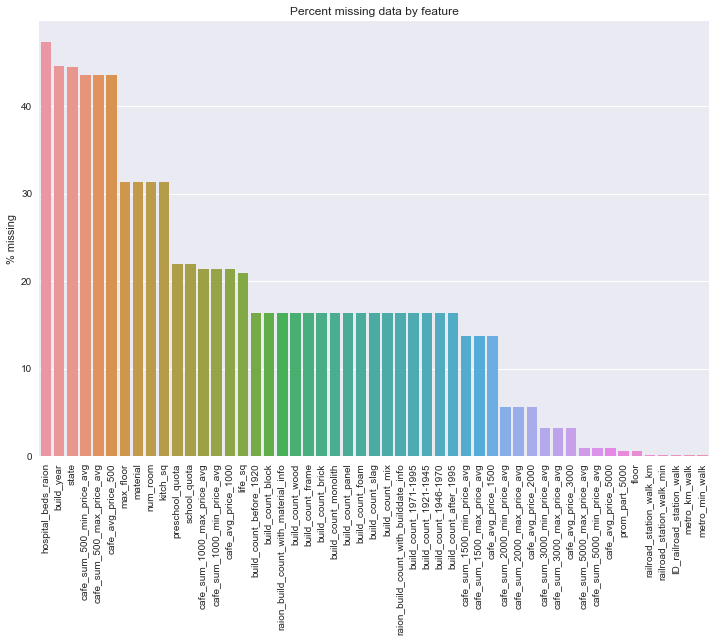

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

### House Features

1. full_sq: total area in square meters, including loggias, balconies and other non-residential areas
2. life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
3. floor: for apartments, floor of the building
4. max_floor: number of floors in the building
5. material: wall material
6. build_year: year built
7. num_room: number of living rooms
8. kitch_sq: kitchen area
9. state: apartment condition

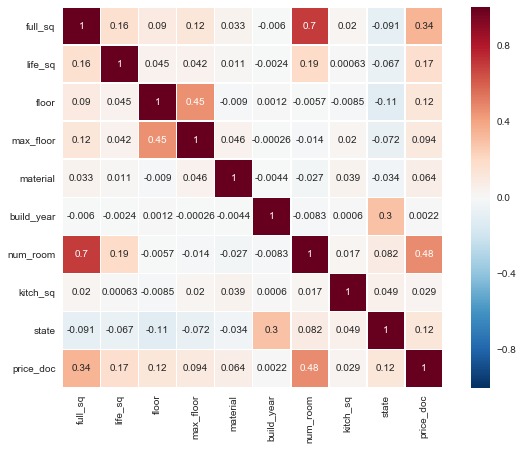

In [51]:
house_features = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']
# Create a correlation matrix for the features of houses itselves and the price
corrmat = train_df[house_features].corr()
fig, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

We can see that the num_room and full_sq has a strong correlation. And both of two variable have strong relation with price. Let's see more about them.

### Number of rooms (num_room)

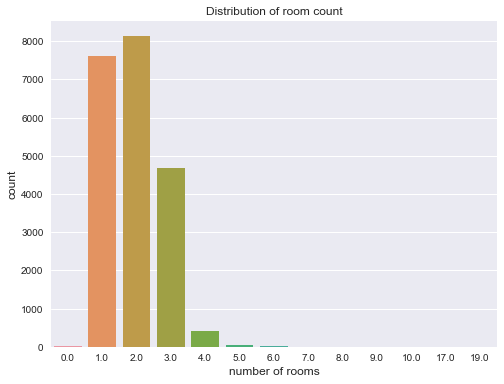

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
bathrooms = train_df['num_room'].value_counts()
x = bathrooms.index
y = bathrooms.values
sns.barplot(x, y )
plt.title('Distribution of room count',fontsize=12)
plt.xlabel('number of rooms', fontsize=12)
plt.ylabel('count', fontsize=12)

In [70]:
# Bin the number of rooms greater than 5
train_df['num_room'].ix[train_df['num_room']>=5] = 5

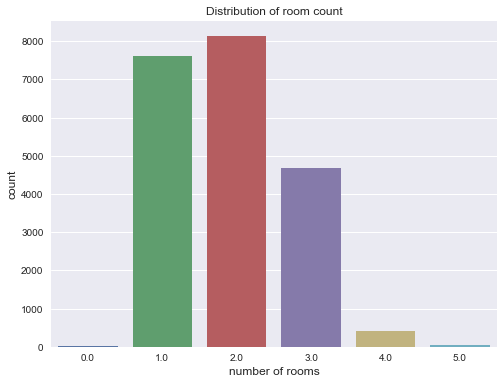

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))
bathrooms = train_df['num_room'].value_counts()
x = bathrooms.index
y = bathrooms.values
sns.barplot(x, y )
plt.title('Distribution of room count',fontsize=12)
plt.xlabel('number of rooms', fontsize=12)
plt.ylabel('count', fontsize=12)

### Total Area of the House (full_sq)

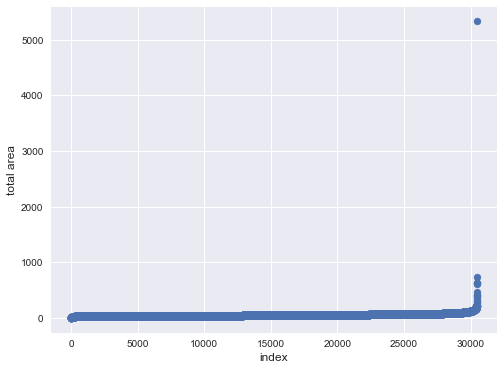

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.full_sq.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('total area', fontsize=12)
plt.show()

From the scatter plot, we can see there is an outstanding oulier. After checking the data, we decide to remove that record.

In [76]:
ind = train_df[train_df['full_sq'] > 2000].index
train_df = train_df.drop(ind)

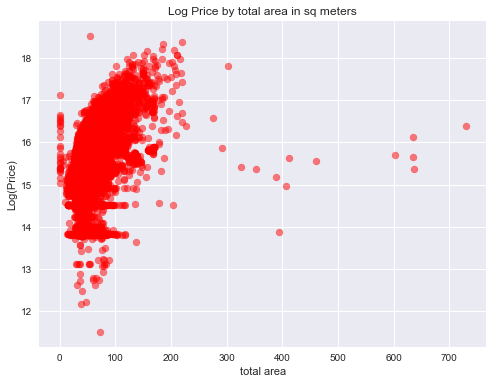

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=train_df['full_sq'], y=train_df['price_doc_log'], c='r', alpha=0.5)
ax.set(title='Log Price by total area in sq meters', xlabel='total area', ylabel='Log(Price)')

### Living Area (life_sq)

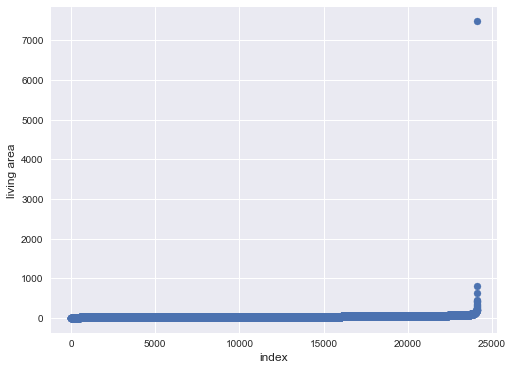

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.life_sq.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('living area', fontsize=12)
plt.show()

In [79]:
# Remove the outliter in life_sq
ind = train_df[train_df['life_sq'] > 2000].index
train_df = train_df.drop(ind)

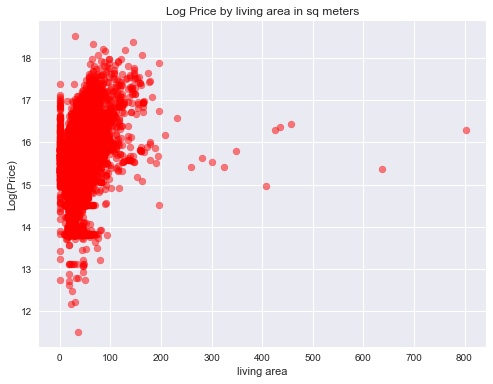

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=train_df['life_sq'], y=train_df['price_doc_log'], c='r', alpha=0.5)
ax.set(title='Log Price by living area in sq meters', xlabel='living area', ylabel='Log(Price)')

In [86]:
# Check whether there are records in which living area is greater than the total area, if yes, we need to drop them
(train_df['life_sq'] > train_df['full_sq']).sum()

36

### Kitchen Area (kitch_sq)

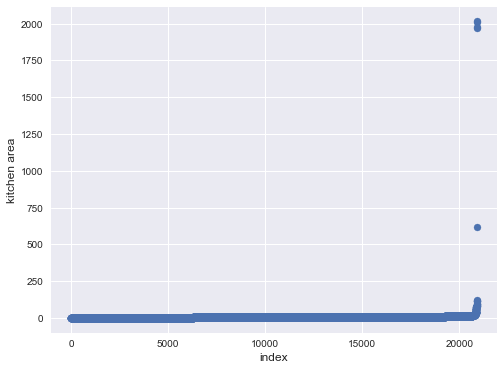

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.kitch_sq.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('kitchen area', fontsize=12)
plt.show()

In [133]:
train_df.loc[train_df['kitch_sq'] > 500, ['id', 'full_sq','life_sq','kitch_sq']]

,id,full_sq,life_sq,kitch_sq
10368,10371,79,41.0,2013.0
11520,11523,38,23.0,620.0
13117,13120,31,19.0,1970.0
21415,21418,43,43.0,2014.0
28734,28737,31,16.0,1974.0


In [134]:
# Remove the outliter in kitch_sq
ind = train_df[train_df['kitch_sq'] > 500].index
train_df = train_df.drop(ind)

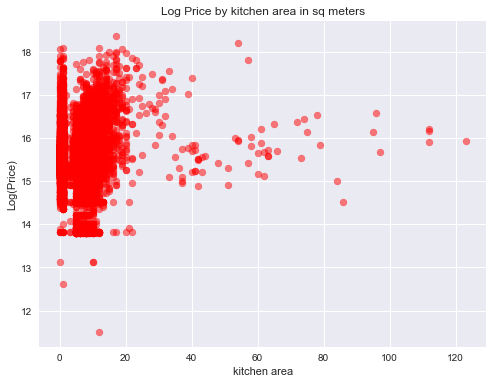

In [135]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=train_df['kitch_sq'], y=train_df['price_doc_log'], c='r', alpha=0.5)
ax.set(title='Log Price by kitchen area in sq meters', xlabel='kitchen area', ylabel='Log(Price)')

In [138]:
# Check whether there are records in which kitchen area is greater than the total area, if yes, we need to drop them
(train_df['kitch_sq'] > train_df['full_sq']).sum()

7

### Floor of the Apartment (floor)

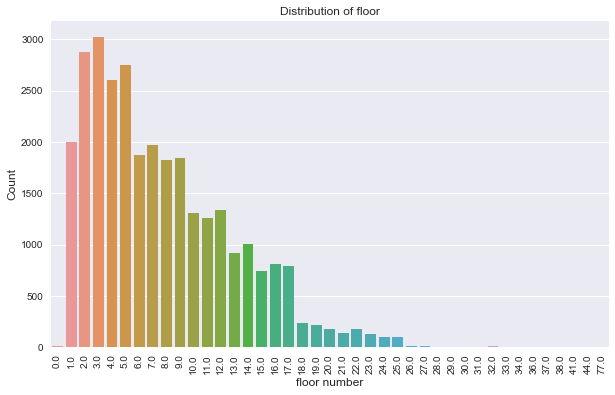

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(x="floor", data=train_df)
plt.title('Distribution of floor',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The distribution is right skewed. Now let us see how the price changes with respect to floors.

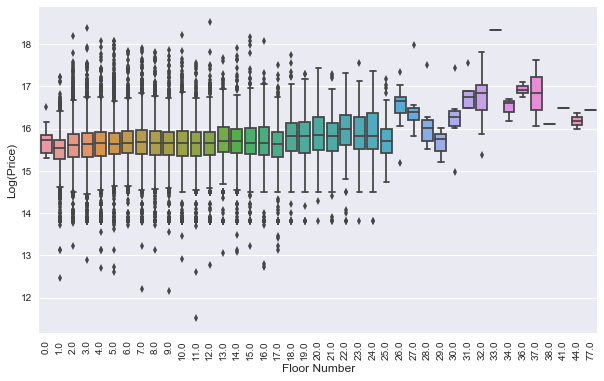

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(x="floor", y="price_doc_log", data=train_df)
plt.ylabel('Log(Price)', fontsize=12)
plt.xlabel('Floor Number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Number of Floors in the Building (max_floor)

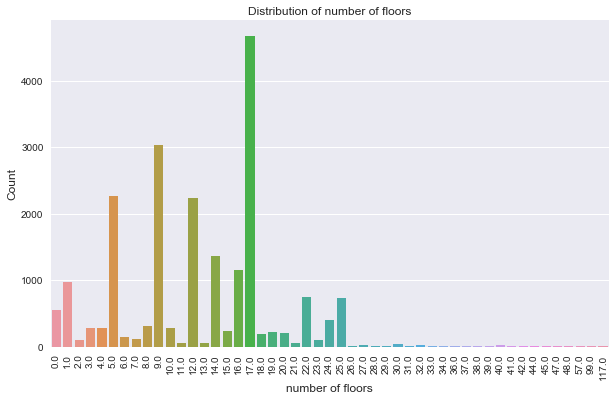

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(x="max_floor", data=train_df)
plt.title('Distribution of number of floors',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('number of floors', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

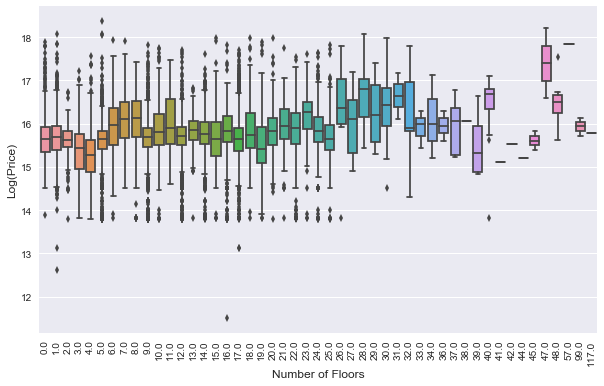

In [115]:
plt.figure(figsize=(10,6))
sns.boxplot(x="max_floor", y="price_doc_log", data=train_df)
plt.ylabel('Log(Price)', fontsize=12)
plt.xlabel('Number of Floors', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [111]:
# Check whether there are records in which the max floor number in the building
# is greater than the floor number of the apartment, if yes, we need to drop them
(train_df['floor'] > train_df['max_floor']).sum()

1493

### Wall Material

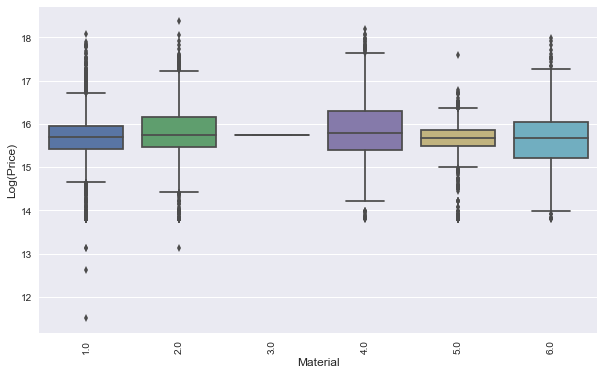

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(x="material", y="price_doc_log", data=train_df)
plt.ylabel('Log(Price)', fontsize=12)
plt.xlabel('Material', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Apartment Condition (state)

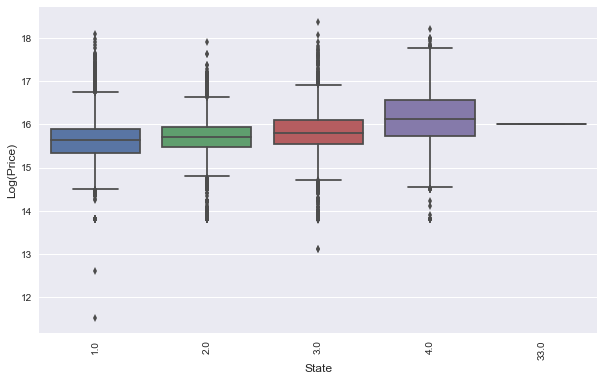

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(x="state", y="price_doc_log", data=train_df)
plt.ylabel('Log(Price)', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

State should be discrete valued between 1 and 4. There is a 33 in it that is cleary a data entry error. We decide to replace it with the mode.

In [137]:
train_df.loc[train_df['state'] == 33, 'state'] = train_df['state'].mode().iloc[0]

## Build Year

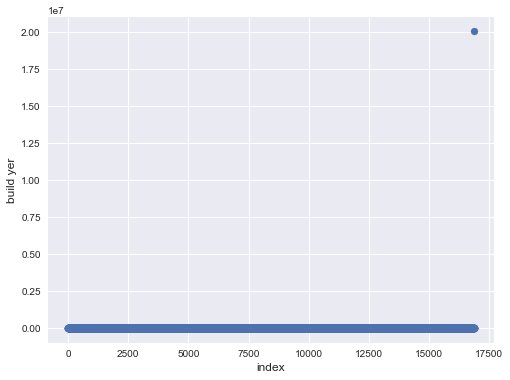

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.build_year.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('build yer', fontsize=12)
plt.show()

In [121]:
ind = train_df[(train_df['build_year'] <= 1691) | (train_df['build_year'] >= 2018)].index
by_df = train_df.drop(ind).sort_values(by=['build_year'])

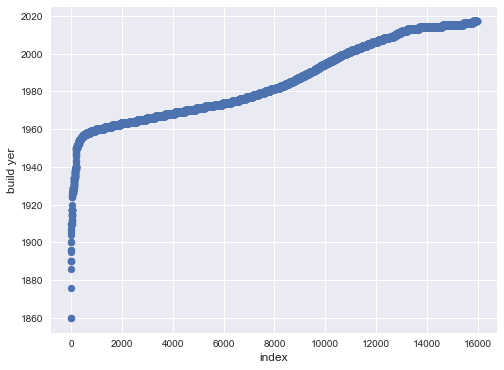

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(range(by_df.shape[0]), np.sort(by_df.build_year.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('build yer', fontsize=12)
plt.show()

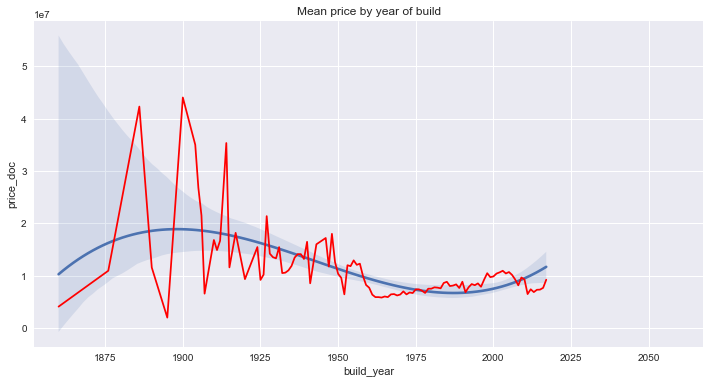

In [118]:
f, ax = plt.subplots(figsize=(12, 6))
by_price = by_df.groupby('build_year')[['build_year', 'price_doc']].mean()
sns.regplot(x="build_year", y="price_doc", data=by_price, scatter=False, order=3, truncate=True)
plt.plot(by_price['build_year'], by_price['price_doc'], color='r')
ax.set(title='Mean price by year of build')

## Demographic Features

1. full_all: Total number of  population in the municipality
2. male_f: Male population
3. female_f: Female population
4. young_all: Population younger than working age
5. young_male: Male population younger than working age 
6. young_female: Feale population younger than working age 
7. work_all: Working-age population
8. work_male: Male working-age population
9. work_female: Female working-age population
10. ekder_all: Population older than  working age
11. ekder_male: Male population older than  working age
12. ekder_female: Female population older than  working age

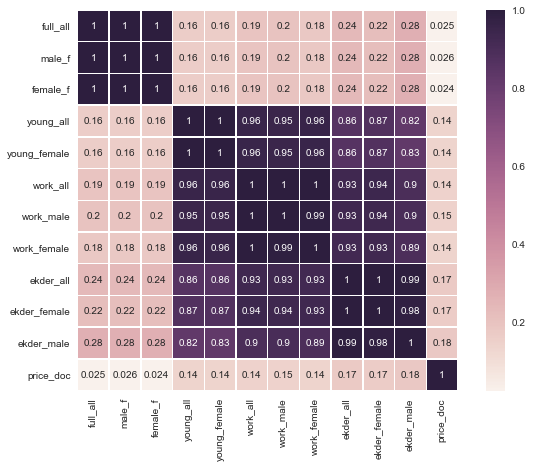

In [140]:
demo_features = ['full_all', 'male_f', 'female_f', 'young_all', 'young_female', 'work_all', 'work_male',
                  'work_female', 'ekder_all','ekder_female','ekder_male','price_doc']
corrmat = train_df[demo_features].corr()
fig, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)